## Predicting the 2024 NBA Champion With Machine Learning: Exploratory Data Analysis

In [1]:
# Import relevant libraries
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Define a dictionary to store all the datasets 
season_statistics = {} 

for year in range(1994, 2024): 
    # Import the CSV file for the corresponding year as a pandas df 
    df = pd.read_csv(f"./data/{year}.csv") 
    
    # Add the dataframe to our dictionary of dataframes 
    season_statistics[year] = df 

### 1. Are there any trends in the pace or offensive style (e.g., higher FTr or 3PAr) among championship teams over multiple seasons?

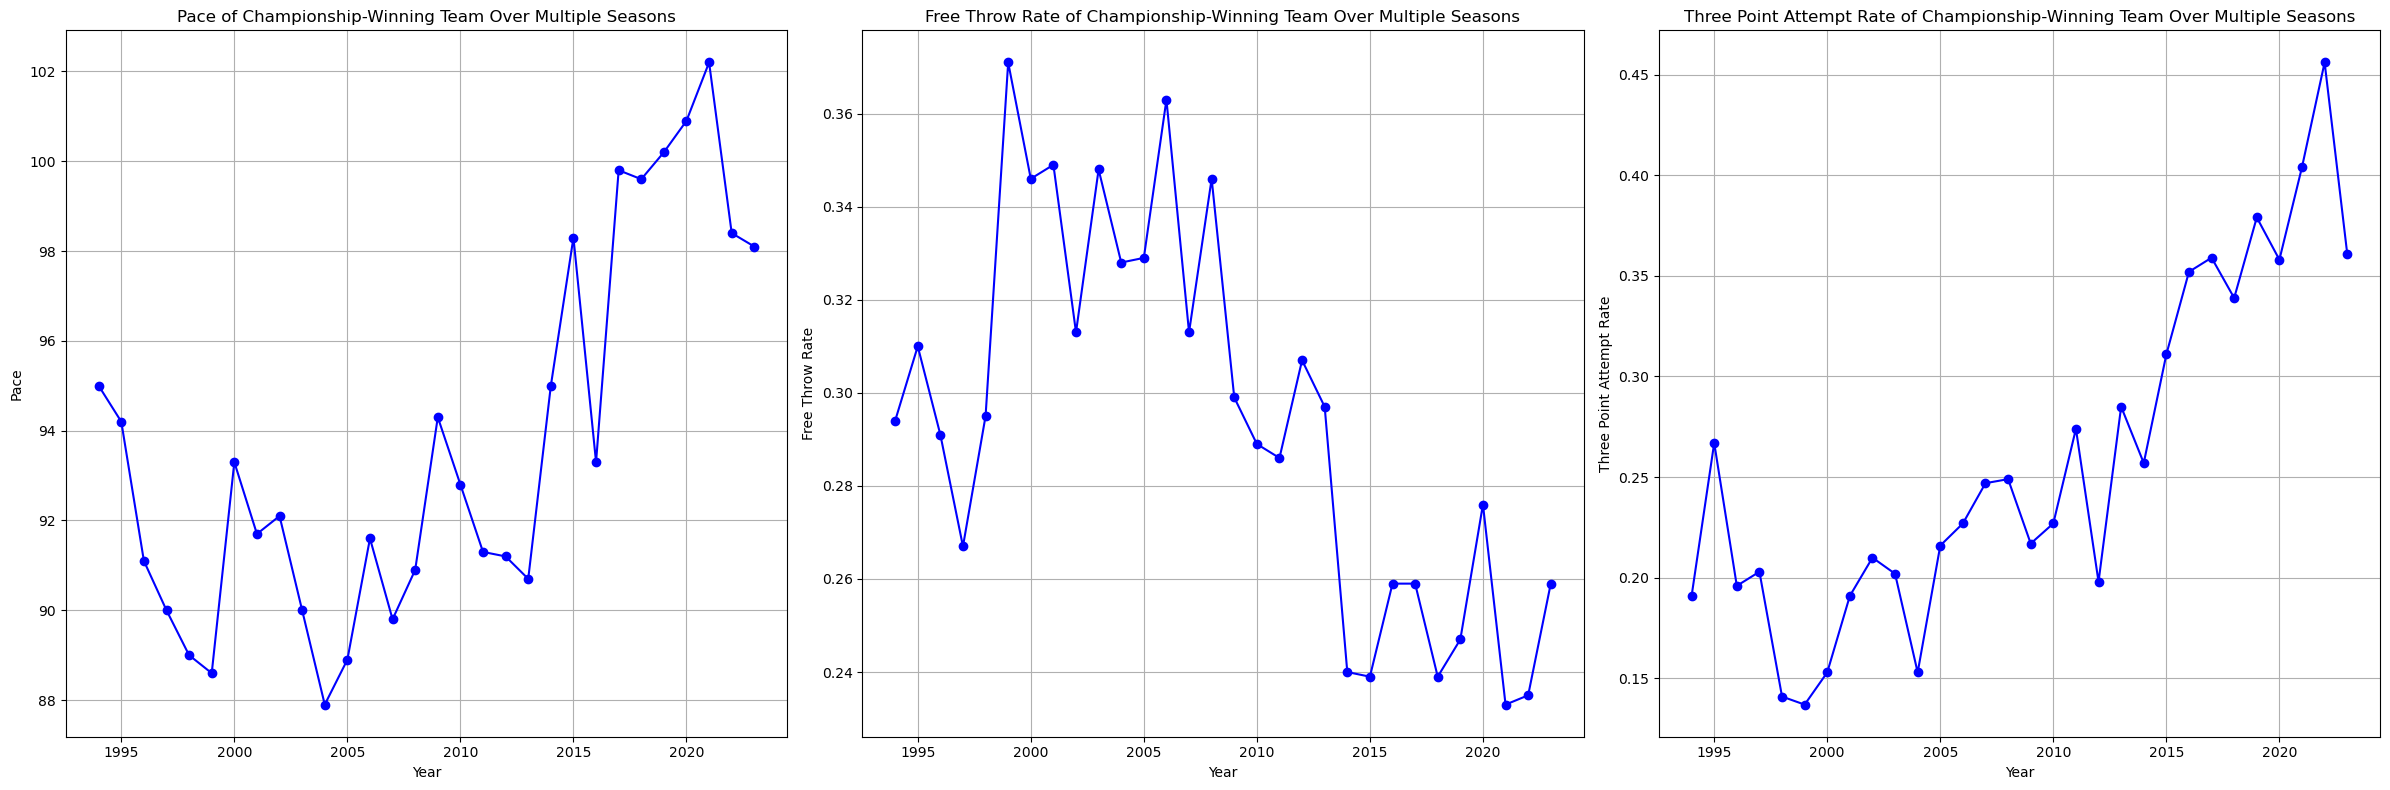

In [3]:
championship_teams_pace = {}
championship_teams_ftr = {}
championship_teams_3par = {}

# Loop through each year and the corresponding dataframe in season_statistics
for year, df in season_statistics.items():
    # Get the 'Pace' value for the championship-winning team and store it in the dictionary
    championship_teams_pace[year] = df[df['Champion'] == 1]['Pace'].values[0]
    
    # Get the 'FTr' (Free Throw Rate) value for the championship-winning team and store it in the dictionary
    championship_teams_ftr[year] = df[df['Champion'] == 1]['FTr'].values[0]
    
    # Get the '3PAr' (Three Point Attempt Rate) value for the championship-winning team and store it in the dictionary
    championship_teams_3par[year] = df[df['Champion'] == 1]['3PAr'].values[0]

# Extracting the years and corresponding pace values from the dictionary
years = list(championship_teams_pace.keys())
paces = list(championship_teams_pace.values())

plt.figure(figsize=(24, 8))

# Create a line plot for 'Pace'
plt.subplot(1, 3, 1)
plt.plot(years, paces, marker='o', linestyle='-', color='blue')
plt.title('Pace of Championship-Winning Team Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Pace')
plt.grid(True)

# Extracting the years and corresponding free throw rate values from the dictionary
years = list(championship_teams_ftr.keys())
ftr = list(championship_teams_ftr.values())

# Create a line plot for 'Free Throw Rate'
plt.subplot(1, 3, 2)
plt.plot(years, ftr, marker='o', linestyle='-', color='blue')
plt.title('Free Throw Rate of Championship-Winning Team Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Free Throw Rate')
plt.grid(True)

# Extracting the years and corresponding three point attempt rate values from the dictionary
years = list(championship_teams_3par.keys())
three_par = list(championship_teams_3par.values())

# Create a line plot for 'Three Point Attempt Rate'
plt.subplot(1, 3, 3)
plt.plot(years, three_par, marker='o', linestyle='-', color='blue')
plt.title('Three Point Attempt Rate of Championship-Winning Team Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Three Point Attempt Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

*While there are fluctations, the pace and three point attempt rate of championship winning teams has generally increased while the free throw rate has generally decreased in championship-winning teams over time.*

### 2. How has player experience (measured by average team age) changed in championship teams over time?

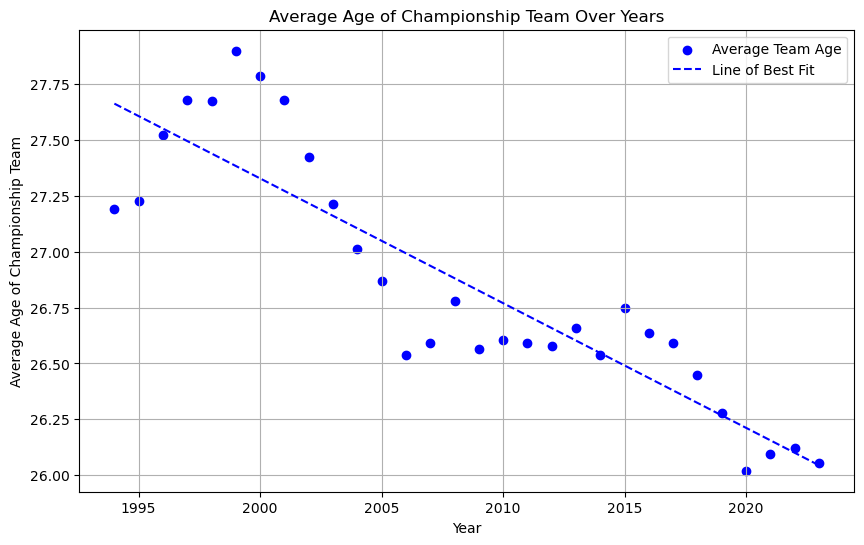

Correlation Between Year and Average Age of Championship Team: -0.8892325880404043


In [4]:
# Define a dictionary to store championship status and average team age
championship_status = {}
average_team_age = {}

# Iterate through the years
for year in range(1994, 2024): 
    # Import the CSV file for the corresponding year as a pandas df 
    file_path = f"./data/{year}.csv"
    df = pd.read_csv(file_path) 
    
    # Calculate average team age
    avg_age = df['Age'].mean()
    
    # Identify championship team
    champion = df[df['Champion'] == 1]['Team'].iloc[0]
    
    # Store championship status and average team age
    championship_status[year] = champion
    average_team_age[year] = avg_age

# Convert dictionaries to DataFrame
df_age = pd.DataFrame(list(average_team_age.items()), columns=['Year', 'AverageTeamAge'])

# Plot the scatter plot with a line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(df_age['Year'], df_age['AverageTeamAge'], color='blue', label='Average Team Age')

# Fit a line of best fit
z = np.polyfit(df_age['Year'], df_age['AverageTeamAge'], 1)
p = np.poly1d(z)
plt.plot(df_age['Year'], p(df_age['Year']), color='blue', linestyle='dashed', label='Line of Best Fit')

plt.xlabel('Year')
plt.ylabel('Average Age of Championship Team')
plt.title('Average Age of Championship Team Over Years')
plt.legend()
plt.grid(True)
plt.show()

# Calculate correlation
correlation = np.corrcoef(df_age['Year'], df_age['AverageTeamAge'])[0, 1]
print("Correlation Between Year and Average Age of Championship Team:", correlation)


*The average age of championship teams has gradually decreased over time, with a correlation of -0.89 indicating a strong negative relationship.*

### 3. Is there a correlation between a high win percentage (W%) and winning the championship?

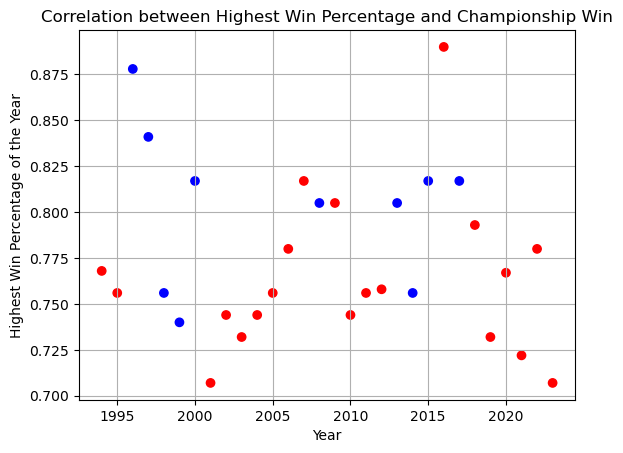

Correlation Coefficient: 0.42


In [5]:
# Define the range of years
years = [year for year in range(1994, 2024)]

# Initialize lists to store highest win percentage and champion status for each year
highest_winp = []
champion_highest_winp = []

# Extract highest win percentage and champion status for each year
for year in range(1994, 2024):
    # Find the highest win percentage of the year
    highest_winp.append(season_statistics[year]["W%"].max())
    # Find the index of the team with the highest win percentage
    index = season_statistics[year]["W%"].idxmax()
    # Check if the team with the highest win percentage won the championship
    if season_statistics[year]["Champion"].iloc[index] == 1:
        champion_highest_winp.append(1)  # Championship win (blue)
    else:
        champion_highest_winp.append(0)  # No championship win (red)

# Plot the correlation between highest win percentage and championship win
plt.title("Correlation between Highest Win Percentage and Championship Win")
plt.xlabel("Year")
plt.ylabel("Highest Win Percentage of the Year")
plt.grid()

# Assign colors based on championship win status
colors = np.where(np.array(champion_highest_winp) < 1, 'red', 'blue')

# Create scatter plot with colors indicating championship win status
plt.scatter(years, highest_winp, c=colors)
plt.show()

# Calculate and display the correlation coefficient
correlation = np.corrcoef(highest_winp, champion_highest_winp)[0, 1]
print(f"Correlation Coefficient: {correlation:.2f}")

*The team with the highest win percentage has won the championship 10 times in the last 30 years, indicating that while the highest winning team may win the championship, they do not always.*

### 4. What are the average statistics (e.g., PPG, DRtg, ORtg) of championship-winning teams compared to non-champions?

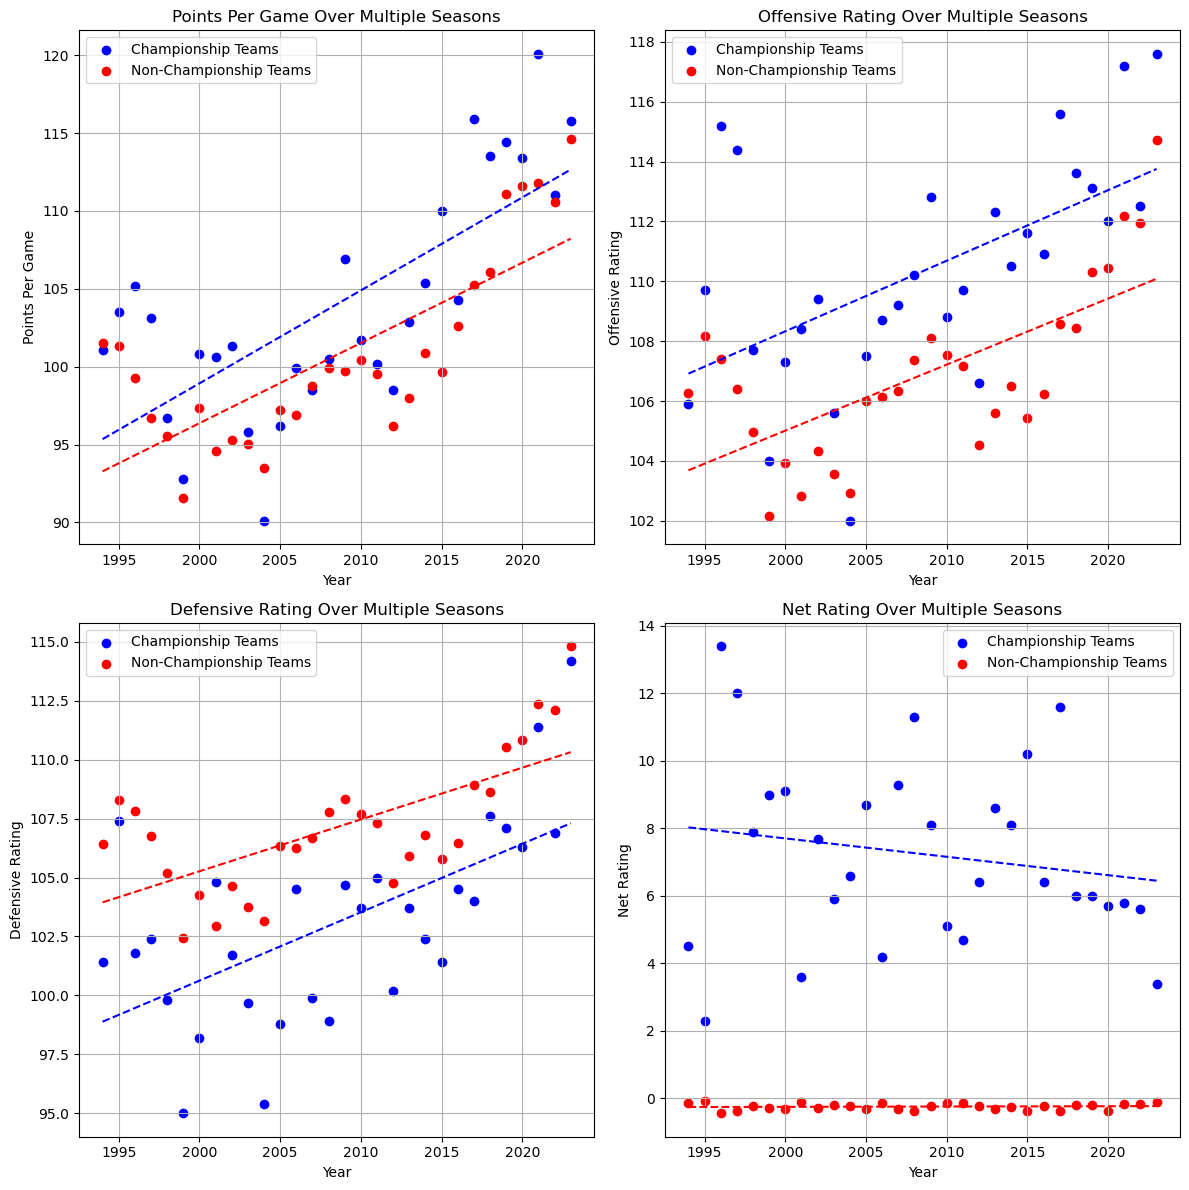

In [6]:
# Initialize dictionaries to store data
championship_teams_ppg = {}
non_championship_teams_ppg = {}
championship_teams_ortg = {}
non_championship_teams_ortg = {}
championship_teams_drtg = {}
non_championship_teams_drtg = {}
championship_teams_nrtg = {}
non_championship_teams_nrtg = {}

# Extract data from season_statistics
for year, df in season_statistics.items():
    championship_teams_ppg[year] = df[df['Champion'] == 1]['PPG'].values[0]
    non_championship_teams_ppg[year] = np.mean(df[df['Champion'] != 1]['PPG'].values)
    championship_teams_ortg[year] = df[df['Champion'] == 1]['ORtg'].values[0]
    non_championship_teams_ortg[year] = np.mean(df[df['Champion'] != 1]['ORtg'].values)
    championship_teams_drtg[year] = df[df['Champion'] == 1]['DRtg'].values[0]
    non_championship_teams_drtg[year] = np.mean(df[df['Champion'] != 1]['DRtg'].values)
    championship_teams_nrtg[year] = df[df['Champion'] == 1]['ORtg'].values[0] - df[df['Champion'] == 1]['DRtg'].values[0]
    non_championship_teams_nrtg[year] = np.mean(df[df['Champion'] != 1]['ORtg'].values) - np.mean(df[df['Champion'] != 1]['DRtg'].values)

# Function to create line of best fit
def best_fit_line(x, y, color):
    coeffs = np.polyfit(x, y, 1)
    poly = np.poly1d(coeffs)
    plt.plot(x, poly(x), linestyle='--', color=color)

# Extract years
years = list(championship_teams_ppg.keys())

# Extract values for each metric
ppg = list(championship_teams_ppg.values())
ppg2 = list(non_championship_teams_ppg.values())
ortg = list(championship_teams_ortg.values())
ortg2 = list(non_championship_teams_ortg.values())
drtg = list(championship_teams_drtg.values())
drtg2 = list(non_championship_teams_drtg.values())
nrtg = list(championship_teams_nrtg.values())
nrtg2 = list(non_championship_teams_nrtg.values())

# Create a figure for the subplots
plt.figure(figsize=(12, 12))

# Subplot 1: Points Per Game
plt.subplot(2, 2, 1)
plt.scatter(years, ppg, marker='o', linestyle='-', color='blue', label='Championship Teams')
best_fit_line(years, ppg, 'blue')
plt.scatter(years, ppg2, marker='o', linestyle='-', color='red', label='Non-Championship Teams')
best_fit_line(years, ppg2, 'red')
plt.title('Points Per Game Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Points Per Game')
plt.legend()
plt.grid(True)

# Subplot 2: Offensive Rating
plt.subplot(2, 2, 2)
plt.scatter(years, ortg, marker='o', linestyle='-', color='blue', label='Championship Teams')
best_fit_line(years, ortg, 'blue')
plt.scatter(years, ortg2, marker='o', linestyle='-', color='red', label='Non-Championship Teams')
best_fit_line(years, ortg2, 'red')
plt.title('Offensive Rating Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Offensive Rating')
plt.legend()
plt.grid(True)

# Subplot 3: Defensive Rating
plt.subplot(2, 2, 3)
plt.scatter(years, drtg, marker='o', linestyle='-', color='blue', label='Championship Teams')
best_fit_line(years, drtg, 'blue')
plt.scatter(years, drtg2, marker='o', linestyle='-', color='red', label='Non-Championship Teams')
best_fit_line(years, drtg2, 'red')
plt.title('Defensive Rating Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Defensive Rating')
plt.legend()
plt.grid(True)

# Subplot 4: Net Rating
plt.subplot(2, 2, 4)
plt.scatter(years, nrtg, marker='o', linestyle='-', color='blue', label='Championship Teams')
best_fit_line(years, nrtg, 'blue')
plt.scatter(years, nrtg2, marker='o', linestyle='-', color='red', label='Non-Championship Teams')
best_fit_line(years, nrtg2, 'red')
plt.title('Net Rating Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Net Rating')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

*While some championship winning teams' offensive (hand in hand with ppg) or defensive rating were surprisingly worse than league average, the net rating of a championship team is always significantly above the league average  of close to 0. A weaker rating on one side of the court is almost certainly offset by the champions' rating on the other side of the court, if both are not strong.*

### 5. How often do teams with the top offensive and defensive ratings (ORtg, DRtg) win the championship?

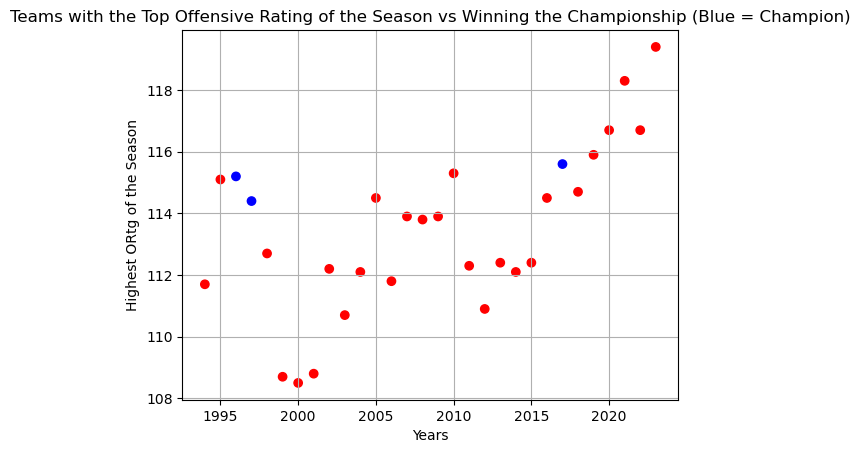

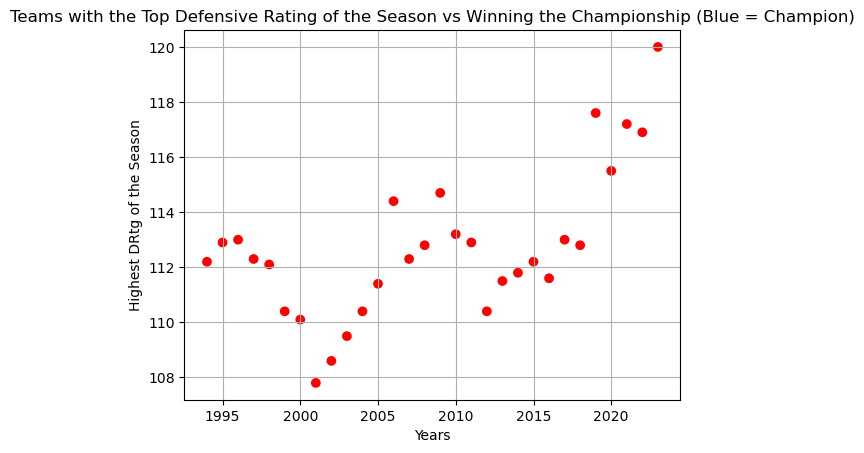

In [7]:
# Define the years from 1994 to 2023
years = [i for i in range(1994, 2024)]

# Initialize lists to store the top offensive rating (ORTG) and top defensive rating (DRTG)
top_ortg = []
top_drtg = []

# Initialize lists to store whether the team with the top ORTG or DRTG won the championship
championship_ortg = []
championship_drtg = []

# Iterate over each year from 1994 to 2023
for year in range(1994, 2024):
    # Find the maximum ORTG of the season
    top_ortg.append(season_statistics[year]["ORtg"].max())
    ortg_idx = season_statistics[year]["ORtg"].idxmax()
    # Check if the team with the top ORTG won the championship
    if season_statistics[year]["Champion"].iloc[ortg_idx] == 1:
        championship_ortg.append(1)  # Championship win (blue)
    else:
        championship_ortg.append(0)  # No championship win (red)

    # Find the maximum DRTG of the season
    top_drtg.append(season_statistics[year]["DRtg"].max())
    drtg_idx = season_statistics[year]["DRtg"].idxmax()
    # Check if the team with the top DRTG won the championship
    if season_statistics[year]["Champion"].iloc[drtg_idx] == 1:
        championship_drtg.append(1)  # Championship win (blue)
    else:
        championship_drtg.append(0)  # No championship win (red)

# Plotting the teams with the top ORTG of the season
plt.title("Teams with the Top Offensive Rating of the Season vs Winning the Championship (Blue = Champion)")
plt.xlabel("Years")
plt.ylabel("Highest ORtg of the Season")
plt.grid()
# Assign colors based on championship win status
colors = np.where(np.array(championship_ortg) < 1, 'red', 'blue')
plt.scatter(years, top_ortg, c=colors)
plt.show()

# Plotting the teams with the top DRTG of the season
plt.title("Teams with the Top Defensive Rating of the Season vs Winning the Championship (Blue = Champion)")
plt.xlabel("Years")
plt.ylabel("Highest DRtg of the Season")
plt.grid()
# Assign colors based on championship win status
colors = np.where(np.array(championship_drtg) < 1, 'red', 'blue')
plt.scatter(years, top_drtg, c=colors)
plt.show()


*Only three teams with the top offensive rating have won the championship in the last 30 years, and no team with the top defensive rating have won the championship in the last 30 years. This indicates that while having a strong net rating is important, having the absolute best rating is not necessary to win a championship.*

### 6. What is the trend in opponent metrics for championship teams? Do stronger defenses lead to championships?

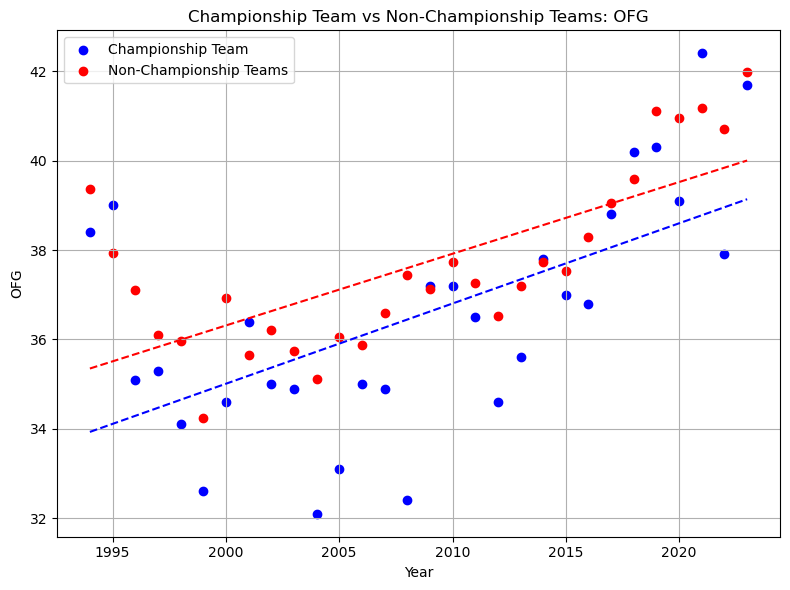

In [8]:
# Define the list of opponent attributes
opponent_attributes = list(df)[21:37]

# Define the opponent metric to display (change this variable to display different metrics)
selected_metric = "OFG"

# Initialize a dictionary to store opponent metrics for championship and non-championship teams
opponent_dict_champion = {}
opponent_dict_non_champion = {}

# Define years
years = [year for year in range(1994, 2024)]

# Iterate over each year
for year in range(1994, 2024):
    # Find the index of the championship team
    champion_team_idx = season_statistics[year]["Champion"].idxmax()
    # Append the opponent metric of the championship team to the corresponding list
    opponent_dict_champion.setdefault(selected_metric, []).append(season_statistics[year][selected_metric].iloc[champion_team_idx])
    # Append the mean opponent metric of non-championship teams to the corresponding list
    opponent_dict_non_champion.setdefault(selected_metric, []).append(season_statistics[year][selected_metric][season_statistics[year]['Champion'] != 1].mean())

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot championship team's opponent metric
ax.scatter(years, opponent_dict_champion[selected_metric], label="Championship Team", color='blue')

# Plot non-championship teams' opponent metric
ax.scatter(years, opponent_dict_non_champion[selected_metric], label="Non-Championship Teams", color='red')

# Add lines of best fit for championship team
coeffs_champion = np.polyfit(years, opponent_dict_champion[selected_metric], 1)
poly_champion = np.poly1d(coeffs_champion)
ax.plot(years, poly_champion(years), linestyle='--', color='blue')

# Add lines of best fit for non-championship teams
coeffs_non_champion = np.polyfit(years, opponent_dict_non_champion[selected_metric], 1)
poly_non_champion = np.poly1d(coeffs_non_champion)
ax.plot(years, poly_non_champion(years), linestyle='--', color='red')

ax.set_title(f"Championship Team vs Non-Championship Teams: {selected_metric}")
ax.set_xlabel("Year")
ax.set_ylabel(selected_metric)
ax.grid()
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

*Given the wide range of opponent metrics, championship teams show larger deviations from the league in certain metrics  not in others. Opponent field goals and opponent points per game (hand in hand with defensive rating) are two where the championship team generally maintains at a lower value than the non championship teams.*

### 7. Do championship teams generally have a higher effective field goal percentage (eFG%) than the league average?

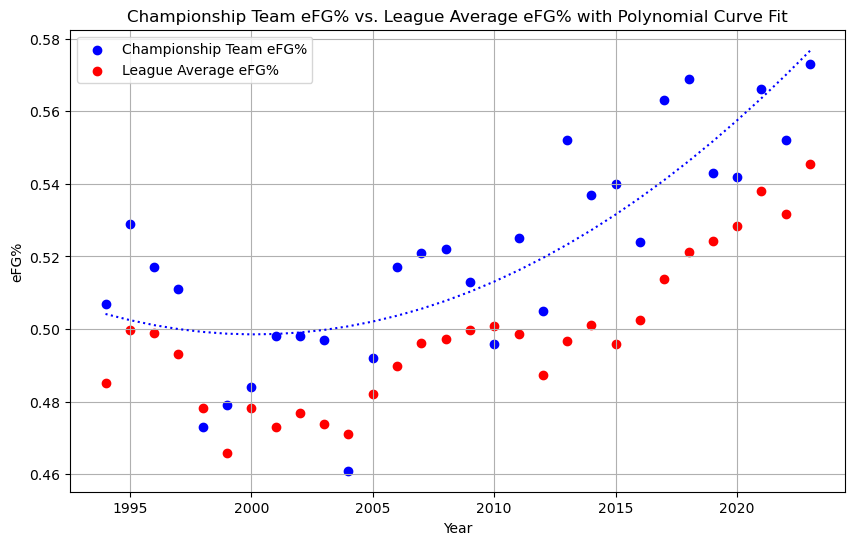

Correlation Between Championship Team eFG% and League Average eFG%: 0.8775442568397336


In [9]:
# Define a dictionary to store championship team eFG% and league average eFG%
championship_efg = {}
league_avg_efg = {}

# Function to calculate championship team eFG% and league average eFG%
def calculate_efg(df):
    champion = df[df['Champion'] == 1]
    championship_efg[df['Year'].iloc[0]] = champion['eFG%'].values[0]
    league_avg_efg[df['Year'].iloc[0]] = df['eFG%'].mean()

# Iterate through the seasons
for year in range(1994, 2024):
    # Import the CSV file for the corresponding year as a pandas df
    df = pd.read_csv(f"./data/{year}.csv")
    
    # Call the function to calculate eFG% statistics
    calculate_efg(df)

# Calculate correlation
efg_championship = np.array(list(championship_efg.values()))
efg_league_avg = np.array(list(league_avg_efg.values()))
correlation = np.corrcoef(efg_championship, efg_league_avg)[0, 1]

# Plot graph with polynomial curve fit
plt.figure(figsize=(10, 6))

# Plot championship team eFG% as scatter points in blue
plt.scatter(years, efg_championship, color='blue', label='Championship Team eFG%')

# Plot league average eFG% as scatter points in red
plt.scatter(years, efg_league_avg, color='red', label='League Average eFG%', marker='o')

# Fit a polynomial curve for championship team eFG% in blue
z = np.polyfit(years, efg_championship, 2)
p = np.poly1d(z)
plt.plot(years, p(years), color='blue', linestyle='dotted')

plt.xlabel('Year')
plt.ylabel('eFG%')
plt.title('Championship Team eFG% vs. League Average eFG% with Polynomial Curve Fit')
plt.legend()
plt.grid(True)
plt.show()

print("Correlation Between Championship Team eFG% and League Average eFG%:", correlation)

*While the correlation between championship team effective field goal percentage and league average field goal percentage is largely positive, indicating a strong relationship between the two, the championship team's eFG% is generally higher than the league average, save of some exceptions (1998, 2004...).*

### 8. How do the free throw metrics (FT/FGA, FTr) of championship teams compare with those of other teams?

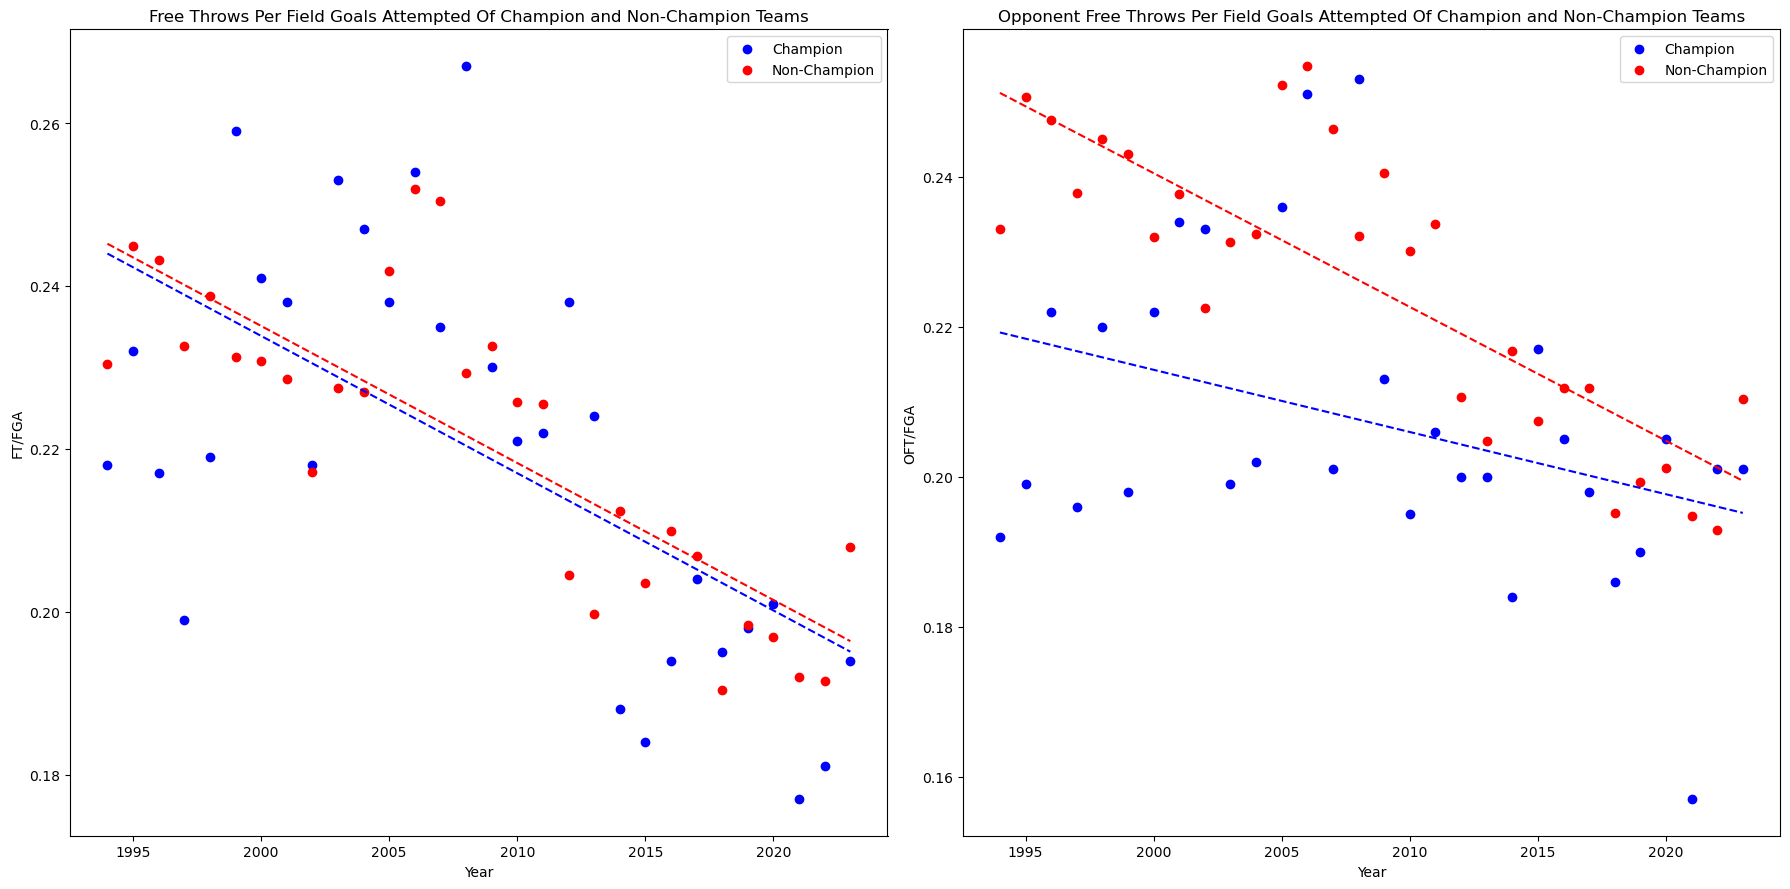

In [10]:
# Filter Year, FT/FGA in championship and non-championship teams for comparison
curr_columns = ['Year', 'FT/FGA', 'OFT/FGA']
championship_teams = {year: df[df['Champion'] == 1][curr_columns] for year, df in season_statistics.items()}
non_champion_teams = {year: df[df['Champion'] == 0][curr_columns] for year, df in season_statistics.items()}

# Convert dictionary to dataframe
championship_teams_df = pd.DataFrame([df.mean() for df in championship_teams.values()])
non_champion_teams_df = pd.DataFrame([df.mean() for df in non_champion_teams.values()])

# Create plot to visualize the scatter plot difference between champion and non-champion teams
plt.figure(figsize=(18, 9))

# Plot for team FT/FGA
plt.subplot(1, 2, 1)
plt.scatter(championship_teams_df['Year'], championship_teams_df['FT/FGA'], color='blue', label='Champion')
plt.scatter(non_champion_teams_df['Year'], non_champion_teams_df['FT/FGA'], color='red', label='Non-Champion')
plt.title('Free Throws Per Field Goals Attempted Of Champion and Non-Champion Teams')
plt.xlabel('Year')
plt.ylabel('FT/FGA')
plt.legend()

# Line of best fit for team FT/FGA
p = np.poly1d(np.polyfit(championship_teams_df['Year'], championship_teams_df['FT/FGA'], 1))
plt.plot(championship_teams_df['Year'], p(championship_teams_df['Year']), "b--")
p = np.poly1d(np.polyfit(non_champion_teams_df['Year'], non_champion_teams_df['FT/FGA'], 1))
plt.plot(non_champion_teams_df['Year'], p(non_champion_teams_df['Year']), "r--")

# Plot for opponent FT/FGAa
plt.subplot(1, 2, 2)
plt.scatter(championship_teams_df['Year'], championship_teams_df['OFT/FGA'], color='blue', label='Champion')
plt.scatter(non_champion_teams_df['Year'], non_champion_teams_df['OFT/FGA'], color='red', label='Non-Champion')
plt.title('Opponent Free Throws Per Field Goals Attempted Of Champion and Non-Champion Teams')
plt.xlabel('Year')
plt.ylabel('OFT/FGA')
plt.legend()

# Line of best fit for opponent FT/FGA
p = np.poly1d(np.polyfit(championship_teams_df['Year'], championship_teams_df['OFT/FGA'], 1))
plt.plot(championship_teams_df['Year'], p(championship_teams_df['Year']), "b--")
p = np.poly1d(np.polyfit(non_champion_teams_df['Year'], non_champion_teams_df['OFT/FGA'], 1))
plt.plot(non_champion_teams_df['Year'], p(non_champion_teams_df['Year']), "r--")

plt.tight_layout()
plt.show()

*While championship teams are taking virtually the same rate of free throws as non-championship teams, there is a noticeable difference in the opponent free throw rate, with the championship teams' opponents taking less field goals. This suggests that a trait to a successful championship team is fouling the opponent less and keeping them away from the free throw line*

### 9. What common characteristics do championship teams share in terms of 3-point shooting (3P%, 3PA)?

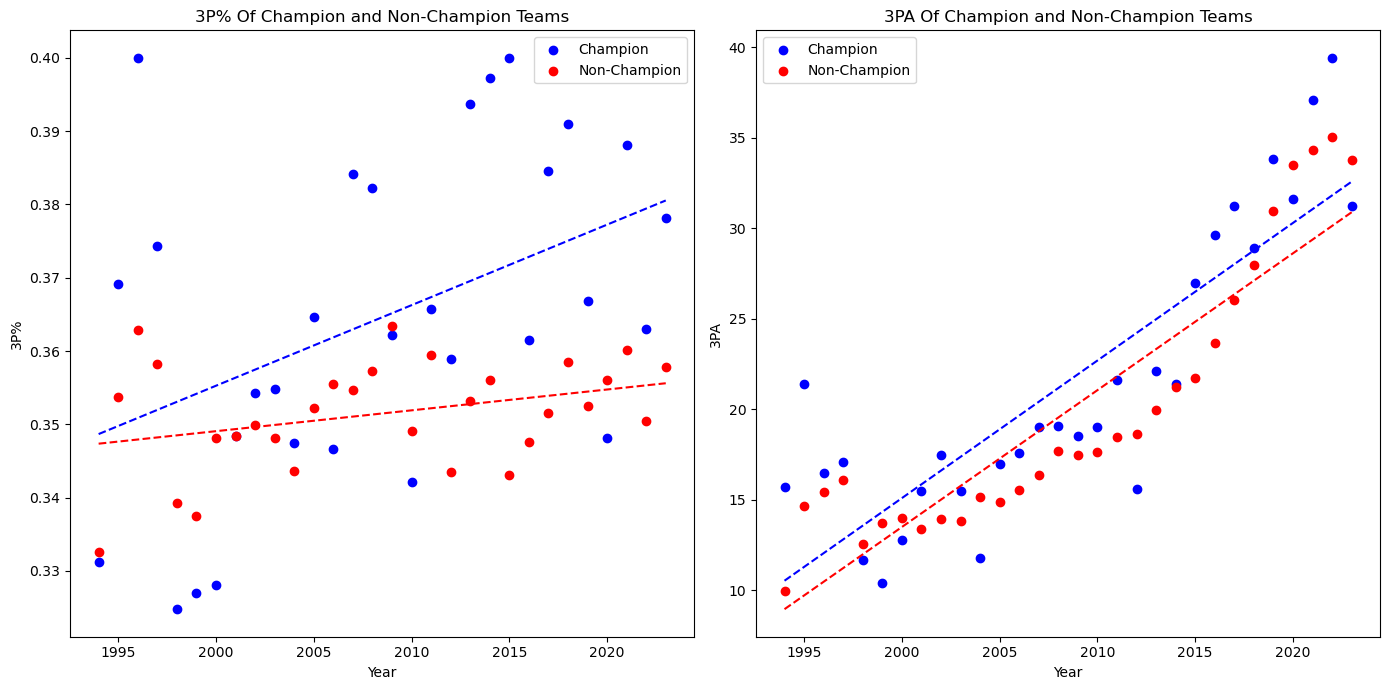

In [11]:
# Filter Year, 3P, 3PA in championship and non-championship teams for comparison
curr_columns = ['Year', '3P', '3PA']
championship_teams = {year: df[df['Champion'] == 1][curr_columns] for year, df in season_statistics.items()}
non_champion_teams = {year: df[df['Champion'] == 0][curr_columns] for year, df in season_statistics.items()}

# Convert Dictionary to dataframe
championship_teams_df = pd.DataFrame([df.mean() for df in championship_teams.values()])
non_champion_teams_df = pd.DataFrame([df.mean() for df in non_champion_teams.values()])
championship_teams_df['3P%'] = championship_teams_df['3P'] / championship_teams_df['3PA']
non_champion_teams_df['3P%'] = non_champion_teams_df['3P'] / non_champion_teams_df['3PA']

# Create scatter plot to visualize the difference between champion and non-champion teams
plt.figure(figsize=(14, 7))

# Plot for 3P%
plt.subplot(1, 2, 1)
plt.scatter(championship_teams_df['Year'], championship_teams_df['3P%'], color='blue', label='Champion')
plt.scatter(non_champion_teams_df['Year'], non_champion_teams_df['3P%'], color='red', label='Non-Champion')
plt.title('3P% Of Champion and Non-Champion Teams')
plt.xlabel('Year')
plt.ylabel('3P%')
plt.legend()

# Line of best fit for 3P%
p = np.poly1d(np.polyfit(championship_teams_df['Year'], championship_teams_df['3P%'], 1))
plt.plot(championship_teams_df['Year'], p(championship_teams_df['Year']), "b--")
p = np.poly1d(np.polyfit(non_champion_teams_df['Year'], non_champion_teams_df['3P%'], 1))
plt.plot(non_champion_teams_df['Year'], p(non_champion_teams_df['Year']), "r--")

# Plot for 3PA
plt.subplot(1, 2, 2)
plt.scatter(championship_teams_df['Year'], championship_teams_df['3PA'], color='blue', label='Champion')
plt.scatter(non_champion_teams_df['Year'], non_champion_teams_df['3PA'], color='red', label='Non-Champion')
plt.title('3PA Of Champion and Non-Champion Teams')
plt.xlabel('Year')
plt.ylabel('3PA')
plt.legend()

# Line of best fit for 3PA
p = np.poly1d(np.polyfit(championship_teams_df['Year'], championship_teams_df['3PA'], 1))
plt.plot(championship_teams_df['Year'], p(championship_teams_df['Year']), "b--")
p = np.poly1d(np.polyfit(non_champion_teams_df['Year'], non_champion_teams_df['3PA'], 1))
plt.plot(non_champion_teams_df['Year'], p(non_champion_teams_df['Year']), "r--")

plt.tight_layout()
plt.show()

*Championship teams generally take slightly more 3 pointers than non championship teams, and have increasingly been more efficient at converting these attempts as compared to non championship teams, with the gap in 3P% becoming larger and larger over time. This indicates the growing importance of having efficient 3 point shooters for a championship team.*

### 10. Is there a correlation between high team assists (AST) per game and winning the championship?

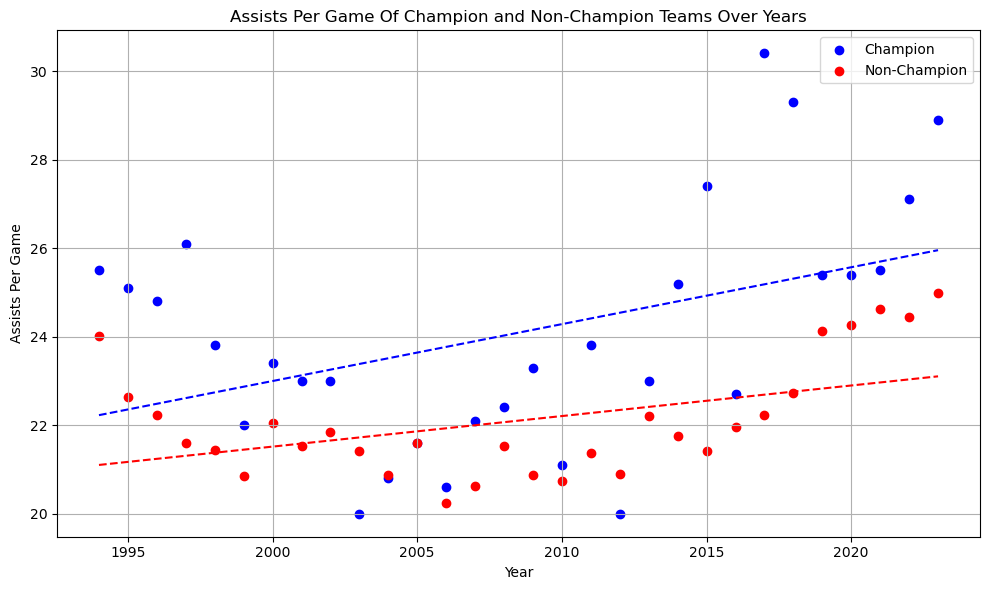

In [12]:
# Filter Year and AST in championship and non-championship teams for comparison
curr_columns = ['Year', 'AST']
championship_teams = {year: df[df['Champion'] == 1][curr_columns] for year, df in season_statistics.items()}
non_champion_teams = {year: df[df['Champion'] == 0][curr_columns] for year, df in season_statistics.items()}

# Convert dictionary to dataframe
championship_teams_df = pd.DataFrame([df.mean() for df in championship_teams.values()])
non_champion_teams_df = pd.DataFrame([df.mean() for df in non_champion_teams.values()])

# Create plot to visualize the scatter plot difference between champion and non-champion teams
plt.figure(figsize=(10, 6))

# Plot for team AST
plt.scatter(championship_teams_df['Year'], championship_teams_df['AST'], color='blue', label='Champion')
plt.scatter(non_champion_teams_df['Year'], non_champion_teams_df['AST'], color='red', label='Non-Champion')
plt.title('Assists Per Game Of Champion and Non-Champion Teams Over Years')
plt.xlabel('Year')
plt.ylabel('Assists Per Game')
plt.legend()

# Line of best fit for team AST
p = np.poly1d(np.polyfit(championship_teams_df['Year'], championship_teams_df['AST'], 1))
plt.plot(championship_teams_df['Year'], p(championship_teams_df['Year']), "b--")
p = np.poly1d(np.polyfit(non_champion_teams_df['Year'], non_champion_teams_df['AST'], 1))
plt.plot(non_champion_teams_df['Year'], p(non_champion_teams_df['Year']), "r--")

plt.grid(True)
plt.tight_layout()
plt.show()

*Championship teams generally have higher team assists than non-championship teams, especially before the year 2000 and after the year 2015. There are some cases where championship teams were not assiting as much as non-championship teams, such as in 2003 and 2012.*

### 11. How does the rebounding performance (ORB%, DRB%) of championship teams compare with the league average?

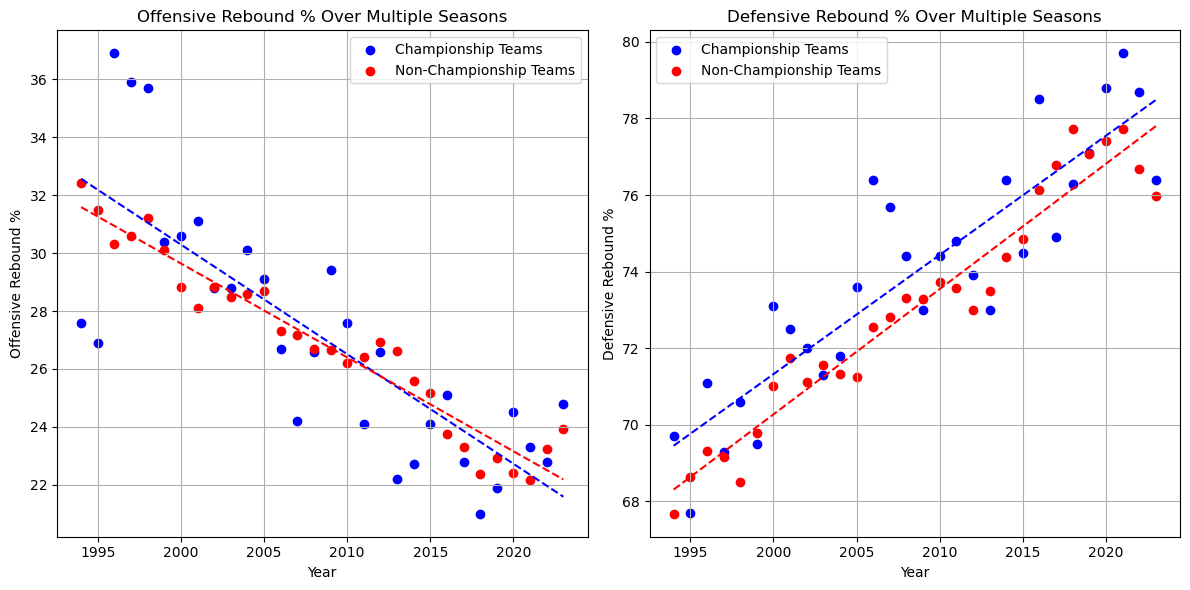

In [13]:
# Initialize dictionaries to store rebound percentage data for championship and non-championship teams
championship_teams_orb = {}
non_championship_teams_orb = {}
championship_teams_drb = {}
non_championship_teams_drb = {}

# Extract rebound percentage data for championship teams for each year
for year, df in season_statistics.items():
    championship_teams_orb[year] = df[df['Champion'] == 1]['ORB%'].values[0]
    championship_teams_drb[year] = df[df['Champion'] == 1]['DRB%'].values[0]

# Extract average rebound percentage data for non-championship teams for each year
for year, df in season_statistics.items():
    non_championship_teams_orb[year] = np.mean(df[df['Champion'] != 1]['ORB%'].values)
    non_championship_teams_drb[year] = np.mean(df[df['Champion'] != 1]['DRB%'].values)

# Extract years from the dictionary keys
years = list(championship_teams_orb.keys())

# Extract rebound percentage values for championship and non-championship teams
orb = list(championship_teams_orb.values())
orb2 = list(non_championship_teams_orb.values())
drb = list(championship_teams_drb.values())
drb2 = list(non_championship_teams_drb.values())

# Create scatter plots for offensive and defensive rebound percentages
plt.figure(figsize=(12, 6))

# Scatter plot for offensive rebound percentage
plt.subplot(1, 2, 1)
plt.scatter(years, orb, marker='o', color='blue', label='Championship Teams')
plt.scatter(years, orb2, marker='o', color='red', label='Non-Championship Teams')

# Add line of best fit for offensive rebound percentage
coeffs_orb_championship = np.polyfit(years, orb, 1)
poly_orb_championship = np.poly1d(coeffs_orb_championship)
plt.plot(years, poly_orb_championship(years), linestyle='--', color='blue')

coeffs_orb_non_championship = np.polyfit(years, orb2, 1)
poly_orb_non_championship = np.poly1d(coeffs_orb_non_championship)
plt.plot(years, poly_orb_non_championship(years), linestyle='--', color='red')

plt.title('Offensive Rebound % Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Offensive Rebound %')
plt.legend()
plt.grid(True)

# Scatter plot for defensive rebound percentage
plt.subplot(1, 2, 2)
plt.scatter(years, drb, marker='o', color='blue', label='Championship Teams')
plt.scatter(years, drb2, marker='o', color='red', label='Non-Championship Teams')

# Add line of best fit for defensive rebound percentage
coeffs_drb_championship = np.polyfit(years, drb, 1)
poly_drb_championship = np.poly1d(coeffs_drb_championship)
plt.plot(years, poly_drb_championship(years), linestyle='--', color='blue')

coeffs_drb_non_championship = np.polyfit(years, drb2, 1)
poly_drb_non_championship = np.poly1d(coeffs_drb_non_championship)
plt.plot(years, poly_drb_non_championship(years), linestyle='--', color='red')

plt.title('Defensive Rebound % Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Defensive Rebound %')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

*While some years have seen significantly higher offensive rebound percentages from championship teams, there are also years where the championship team is below the non-championship teams in offensive rebound percentage. This is also the case for defensive rebound percentage but sees the championship team being a little more consistently superior to the non-championship teams in this metric.*

### 12. Do teams that win the championship have significantly lower turnover percentages (TOV%) compared to others?

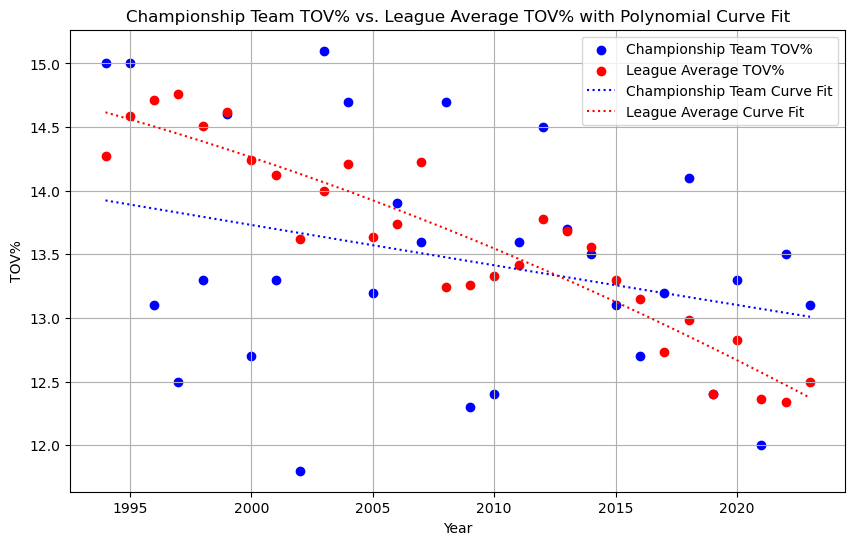

Correlation Between Championship Team TOV% and League Average TOV%: 0.3686165438796724


In [14]:
# Define a dictionary to store championship team TOV% and league average TOV%
championship_tov = {}
league_avg_tov = {}

# Function to calculate championship team TOV% and league average TOV%
def calculate_tov(df):
    champion = df[df['Champion'] == 1]
    championship_tov[df['Year'].iloc[0]] = champion['TOV%'].values[0]
    league_avg_tov[df['Year'].iloc[0]] = df['TOV%'].mean()

# Iterate through the seasons
for year in range(1994, 2024):
    # Import the CSV file for the corresponding year as a pandas df
    df = pd.read_csv(f"./data/{year}.csv")
    
    # Call the function to calculate TOV% statistics
    calculate_tov(df)

# Calculate correlation
tov_championship = np.array(list(championship_tov.values()))
tov_league_avg = np.array(list(league_avg_tov.values()))
correlation = np.corrcoef(tov_championship, tov_league_avg)[0, 1]

# Plot graph with polynomial curve fit
years = list(championship_tov.keys())
tov_championship = list(championship_tov.values())
tov_league_avg = list(league_avg_tov.values())

plt.figure(figsize=(10, 6))

# Plot championship team TOV% as scatter points in blue
plt.scatter(years, tov_championship, color='blue', label='Championship Team TOV%')

# Plot league average TOV% as scatter points in red
plt.scatter(years, tov_league_avg, color='red', label='League Average TOV%', marker='o')

# Fit a polynomial curve for championship team TOV% in blue
z_championship = np.polyfit(years, tov_championship, 2)
p_championship = np.poly1d(z_championship)
plt.plot(years, p_championship(years), color='blue', linestyle='dotted', label='Championship Team Curve Fit')

# Fit a polynomial curve for league average TOV% in red
z_league_avg = np.polyfit(years, tov_league_avg, 2)
p_league_avg = np.poly1d(z_league_avg)
plt.plot(years, p_league_avg(years), color='red', linestyle='dotted', label='League Average Curve Fit')

plt.xlabel('Year')
plt.ylabel('TOV%')
plt.title('Championship Team TOV% vs. League Average TOV% with Polynomial Curve Fit')
plt.legend()
plt.grid(True)
plt.show()

print("Correlation Between Championship Team TOV% and League Average TOV%:", correlation)

*The correlation between championship team turnover rate and league average turnover rate is low, indicating a weak relationship between the two. There is no consistent relationship as some championship teams were turning over the ball less than average, while some were turning over the ball more.*

### 13. How do defensive metrics (like BLK per game) of championship teams compare to those of non-championship teams?

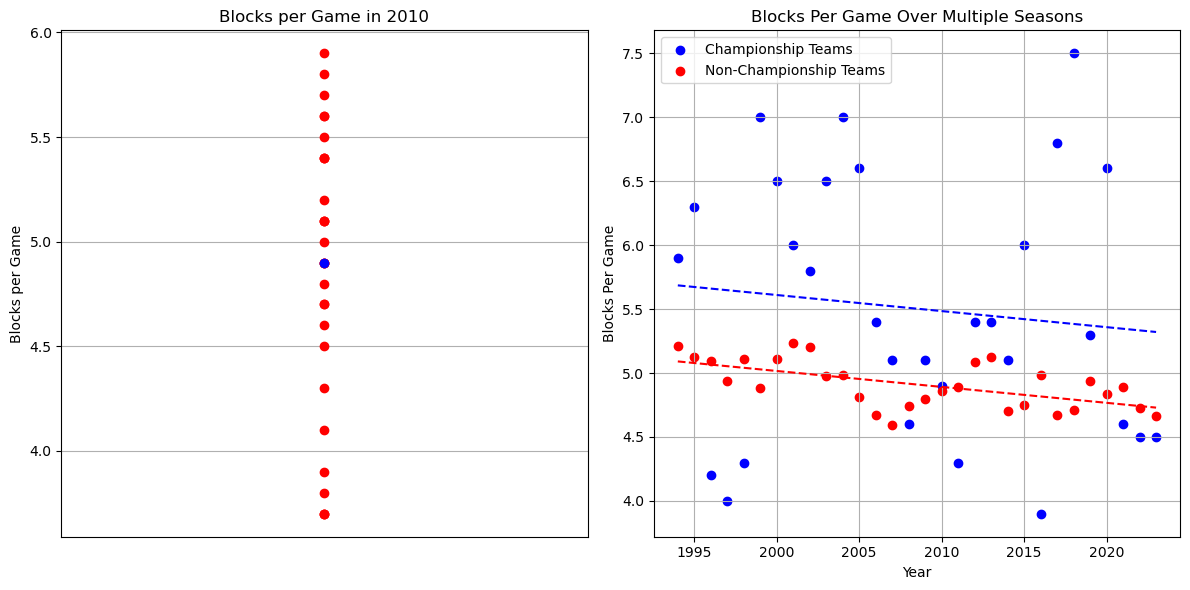

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract championship and non-championship teams data for the specific year, can change to see different years
year = 2010
championship_teams_blk = season_statistics[year][season_statistics[year]['Champion'] == 1]['BLK'].values[0]
non_championship_teams_blk = season_statistics[year][season_statistics[year]['Champion'] != 1]['BLK'].values

# Plot the data
plt.figure(figsize=(12, 6))

# Plot non-championship teams on the same vertical line
plt.subplot(1, 2, 1)
for i, blocks in enumerate(non_championship_teams_blk, start=1):
    plt.plot([1], [blocks], marker='o', linestyle='', color='red')
    
# Plot championship team on one vertical line
plt.plot([1], [championship_teams_blk], marker='o', linestyle='', color='blue', label='Championship Team')

plt.title(f'Blocks per Game in {year}')
plt.ylabel('Blocks per Game')
plt.xticks([])
plt.grid(True)

# Extract championship and non-championship teams data for multiple seasons
championship_teams_blk = {}
non_championship_teams_blk = {}
for year, df in season_statistics.items():
    championship_teams_blk[year] = df[df['Champion'] == 1]['BLK'].values[0]
    non_championship_teams_blk[year] = np.mean(df[df['Champion'] != 1]['BLK'].values)

# Extract years
years = list(championship_teams_blk.keys())

# Extract values for each metric
blk = list(championship_teams_blk.values())
blk2 = list(non_championship_teams_blk.values())

# Scatter plot for championship and non-championship teams
plt.subplot(1, 2, 2)
plt.scatter(years, blk, marker='o', linestyle='-', color='blue', label='Championship Teams')
plt.scatter(years, blk2, marker='o', linestyle='-', color='red', label='Non-Championship Teams')

# Add lines of best fit
coeffs_championship = np.polyfit(years, blk, 1)
poly_championship = np.poly1d(coeffs_championship)
plt.plot(years, poly_championship(years), linestyle='--', color='blue')

coeffs_non_championship = np.polyfit(years, blk2, 1)
poly_non_championship = np.poly1d(coeffs_non_championship)
plt.plot(years, poly_non_championship(years), linestyle='--', color='red')

plt.title('Blocks Per Game Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Blocks Per Game')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*Many championship teams were very strong in blocks per game as compared to non-championship teams; however, some championship teams were notably below the average of non championship teams.*

### 14. Do teams that improve most in key statistical areas from one season to the next tend to win championships?

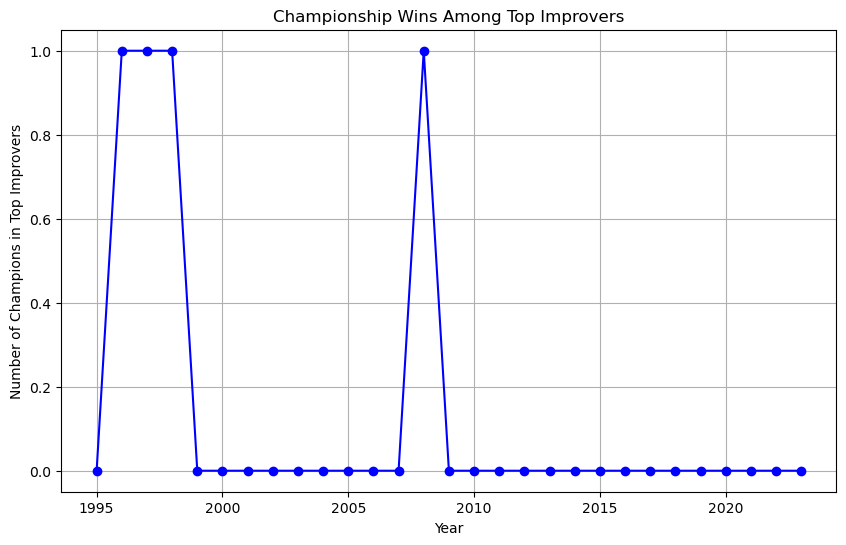

In [16]:
# Add Column for Change in W%
for year in range(1995, 2024):
    current_year_df = season_statistics[year].set_index('Team')
    previous_year_df = season_statistics[year - 1].set_index('Team')
    season_statistics[year]['Change in W%'] = current_year_df['W%'] - previous_year_df['W%']
    season_statistics[year]['Change in PPG'] = current_year_df['PPG'] - previous_year_df['PPG']

# Add a column to store a score of improvement
for year in range(1995, 2024):
    season_statistics[year]['Improvement Score'] = season_statistics[year][['Change in W%', 'Change in PPG']].sum(axis=1)

# Aggregate the data to see if improvements correlate with championships
championship_analysis = []

for year in range(1995, 2024):
    if 'Champion' in season_statistics[year].columns:
        top_improvers = season_statistics[year].nlargest(5, 'Improvement Score')  # Top 5 improvers
        champs_in_top_improvers = top_improvers[top_improvers['Champion'] == 1]
        championship_analysis.append((year, len(champs_in_top_improvers)))

# Convert to dataframe for easier analysis
championship_analysis_df = pd.DataFrame(championship_analysis, columns=['Year', 'Champs in Top Improvers'])


plt.figure(figsize=(10, 6))
plt.plot(championship_analysis_df['Year'], championship_analysis_df['Champs in Top Improvers'], marker='o', color = 'blue')
plt.title('Championship Wins Among Top Improvers')
plt.xlabel('Year')
plt.ylabel('Number of Champions in Top Improvers')
plt.grid(True)
plt.show()

*In the last 30 years, one of the top five most improved teams has only won the championship 4 times. This indicates that a large improvement in a team's success does not mean that they will win a championship.*

### 15. What is the impact of home arena attendance (Attend./G) on championship success?

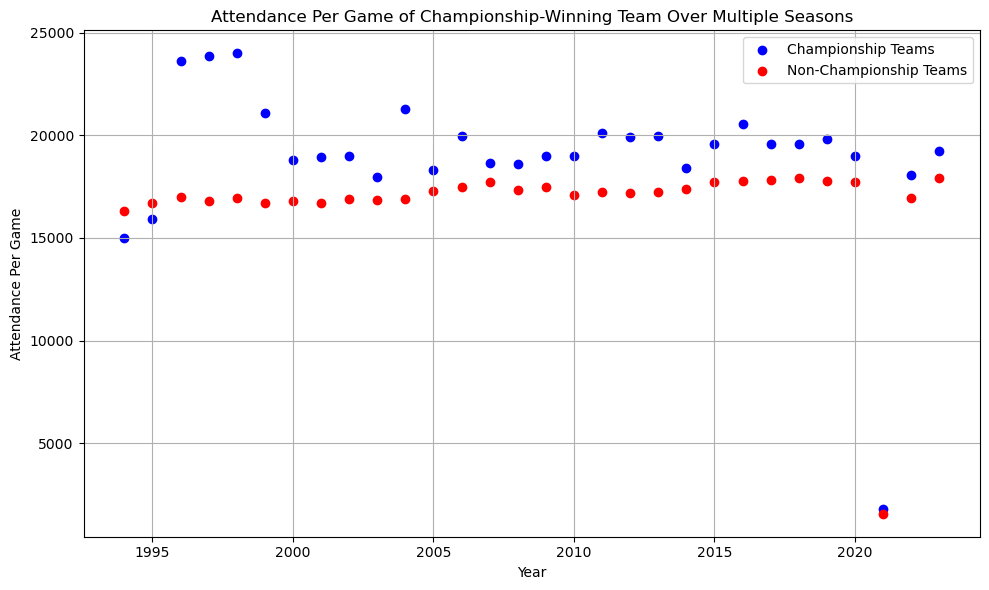

In [17]:
# Initialize dictionaries to store attendance data for championship and non-championship teams
championship_teams_attendance = {}
non_championship_teams_attendance = {}

# Extract attendance data for championship teams for each year
for year, df in season_statistics.items():
    championship_teams_attendance[year] = df[df['Champion'] == 1]['Attend./G'].values[0]

# Extract average attendance data for non-championship teams for each year
for year, df in season_statistics.items():
    non_championship_teams_attendance[year] = np.mean(df[df['Champion'] != 1]['Attend./G'].values)

# Extract years from the dictionary keys
years = list(championship_teams_attendance.keys())

# Extract attendance values for championship and non-championship teams
attendance = list(championship_teams_attendance.values())
attendance2 = list(non_championship_teams_attendance.values())

# Scatter plot for attendance data
plt.figure(figsize=(10, 6))
plt.scatter(years, attendance, marker='o', linestyle='-', color='blue', label='Championship Teams')
plt.scatter(years, attendance2, marker='o', linestyle='-', color='red', label='Non-Championship Teams')

# Set plot titles and labels
plt.title('Attendance Per Game of Championship-Winning Team Over Multiple Seasons')
plt.xlabel('Year')
plt.ylabel('Attendance Per Game')

# Display legend, grid, and adjust layout
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*The attendance per game of championship winning teams are higher than that of non-championship teams, except for in 1994 and 1995. This could be due to other confounding factors, such as larger market teams winning the championship or larger team success drawing more fans to the stadium rather than the fans themselves bringing success to the team. The relationship between attendance and a championship is therefore unclear.*

### 16. What is the average age of championship teams, and how does this compare with non-champion teams?

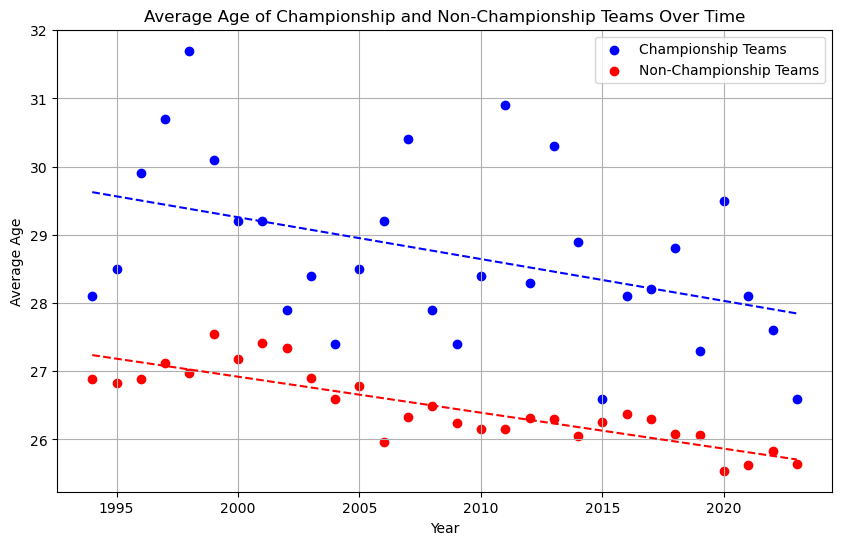

Average Age of Championship Teams: 28.73666666666666
Average Age of Non-Championship Teams: 26.471169854808295
Correlation between Year and Average Age (Championship Teams): -0.42646039428076055
Correlation between Year and Average Age (Non-Championship Teams): -0.8536528822849844


In [18]:
# Initialize variables to store age data
champion_ages = []
non_champion_ages = []
years = []

# Iterate through each year's data
for year, df in season_statistics.items():
    # Extract champion team and its age
    champion_team = df[df['Champion'] == 1]
    champion_age = champion_team['Age'].mean()
    if not np.isnan(champion_age):  # Check for NaN values
        champion_ages.append(champion_age)
    
    # Extract non-champion teams and their ages
    non_champion_teams = df[df['Champion'] == 0]
    non_champion_age = non_champion_teams['Age'].mean()
    if not np.isnan(non_champion_age):  # Check for NaN values
        non_champion_ages.append(non_champion_age)
    
    years.append(year)

# Calculate average age of championship and non-championship teams
avg_champion_age = sum(champion_ages) / len(champion_ages)
avg_non_champion_age = sum(non_champion_ages) / len(non_champion_ages)

# Fit a linear regression line to the data
slope_champion, intercept_champion, _, _, _ = linregress(years, champion_ages)
slope_non_champion, intercept_non_champion, _, _, _ = linregress(years, non_champion_ages)

# Calculate correlation scores
correlation_champion = np.corrcoef(years, champion_ages)[0, 1]
correlation_non_champion = np.corrcoef(years, non_champion_ages)[0, 1]

# Plot the data points and the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(years, champion_ages, label='Championship Teams', color='blue')
plt.plot(years, intercept_champion + slope_champion * np.array(years), 'b--')
plt.scatter(years, non_champion_ages, label='Non-Championship Teams', color='red')
plt.plot(years, intercept_non_champion + slope_non_champion * np.array(years), 'r--')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.title('Average Age of Championship and Non-Championship Teams Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Average Age of Championship Teams:", avg_champion_age)
print("Average Age of Non-Championship Teams:", avg_non_champion_age)
print("Correlation between Year and Average Age (Championship Teams):", correlation_champion)
print("Correlation between Year and Average Age (Non-Championship Teams):", correlation_non_champion)

*While average age of all teams has decreased over time, the average age of championship teams is consistently higher than the ages of non championship teams, indicating that age and experience of players is an important factor of succeeding in the league and winning a championship.*

### 17. Are there any patterns in the strength of schedule (SOS) of championship-winning teams?

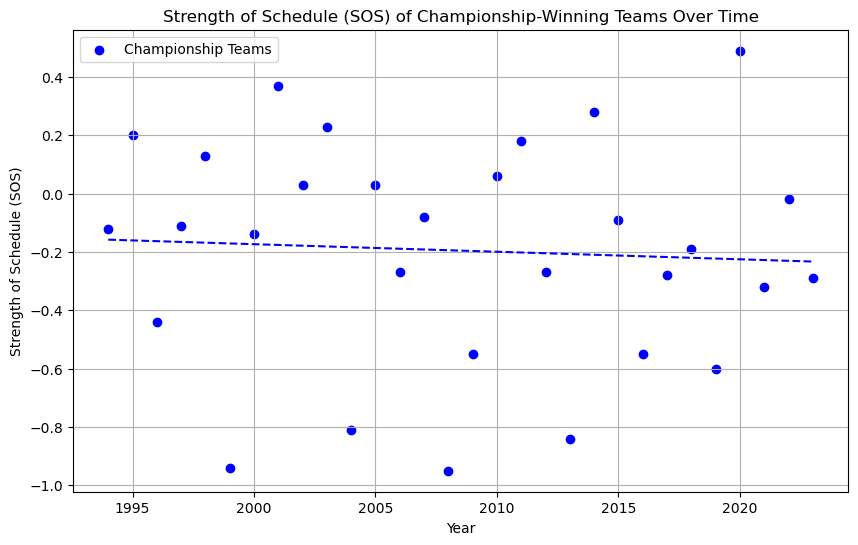

Average SOS of Championship Teams: -0.1953333333333333
Correlation between Year and SOS (Championship Teams): 0.003527438526311514


In [19]:
# Initialize variables to store SOS data and years
champion_sos = []
years = []

# Iterate through each year's data
for year, df in season_statistics.items():
    # Extract champion team and its SOS
    champion_team = df[df['Champion'] == 1]
    sos_champion = champion_team['SOS'].mean()
    if not np.isnan(sos_champion):  # Check for NaN values
        champion_sos.append(sos_champion)
        years.append(year)

# Calculate average SOS of championship teams
avg_champion_sos = sum(champion_sos) / len(champion_sos)

# Fit a linear regression line to the data
slope_champion, intercept_champion, r_value, _, _ = linregress(years, champion_sos)

# Calculate correlation coefficient
correlation_champion = r_value ** 2  # Square of the Pearson correlation coefficient

# Plot the data points and the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(years, champion_sos, label='Championship Teams', color='blue')
plt.plot(years, intercept_champion + slope_champion * np.array(years), 'b--')
plt.xlabel('Year')
plt.ylabel('Strength of Schedule (SOS)')
plt.title('Strength of Schedule (SOS) of Championship-Winning Teams Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("Average SOS of Championship Teams:", avg_champion_sos)
print("Correlation between Year and SOS (Championship Teams):", correlation_champion)

*The strength of schedule of championship teams over the years has varied, with some championship teams having a more difficult schedule than normal and some having a less difficult schedule than normal. The general trend is that championship teams have a slightly easier schedule than average, but this may not play a huge part into winning a championship, which is determined by just a few playoff series against playoff caliber teams.*

### 17. Which team have won the most championships in the last 30 years?

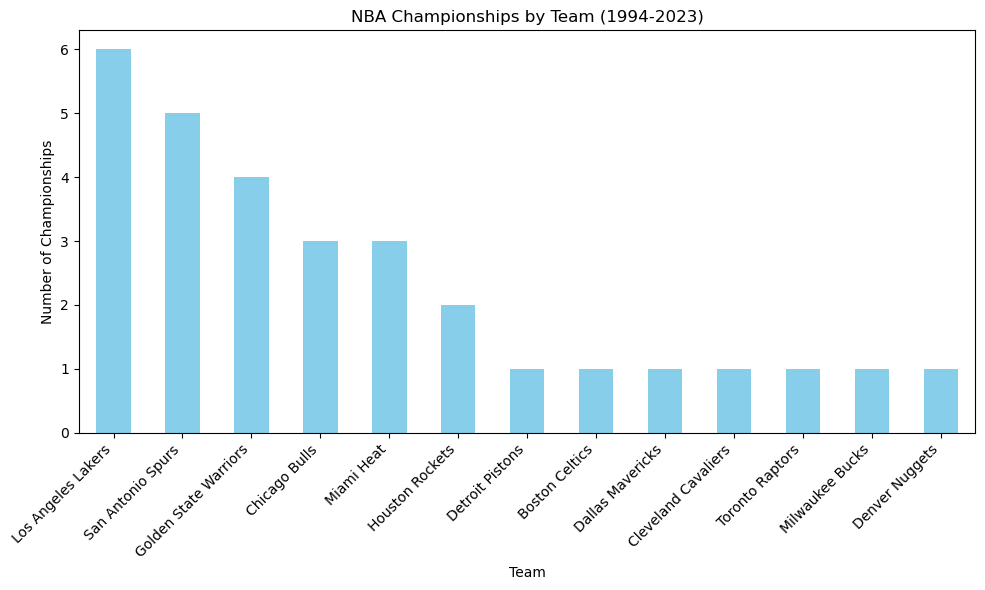

In [25]:
import matplotlib.pyplot as plt
import numpy as np

champions = []

for _, df in season_statistics.items():
    champ = df[df['Champion'] == 1]['Team'].values[0]
    champions.append(champ)

# Count the occurrences of each team
champions_count = pd.Series(champions).value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
champions_count.plot(kind='bar', color='skyblue')
plt.title('NBA Championships by Team (1994-2023)')
plt.xlabel('Team')
plt.ylabel('Number of Championships')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()